In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [85]:
# initialize data
id_ascend=pd.DataFrame(
    [
        [2, 1497.37, 86.53], 
        [3, 1089.28, 90.37],
        [4, 852.51, 91.95], 
        [5, 688.36, 93.17], 
        [6, 577.07, 93.88], 
        [7, 494.24, 94.33], 
        [8, 437.53, 94.63], 
    ], 
    columns=['entry points', 'qps','recall@10'])#.set_index('entry points')


closest_rep=pd.DataFrame(
    [
        [2, 1896.22, 87.05], 
        [3, 1347.79, 89.99],
        [4, 1039.49, 91.59], 
        [5, 840.76, 92.59], 
        [6, 705.03, 93.25], 
        [7, 601.65, 93.74], 
        [8, 529.94, 94.07], 
    ], 
    columns=['entry points', 'qps','recall@10'])#.set_index('entry points')

roundrobin=pd.DataFrame(
    [
        [2,1470.12, 87.04], 
        [3, 1098.24,90.33],
        [4, 883.99,91.99], 
        [5, 731.79, 92.94], 
        [6, 625.97,93.60], 
        [7, 543.89,94.04], 
        [8, 483.65, 94.36], 
    ], 
    columns=['entry points', 'qps','recall@10'])#.set_index('entry points')

In [86]:
id_ascend['entry points']

0    2
1    3
2    4
3    5
4    6
5    7
6    8
Name: entry points, dtype: int64

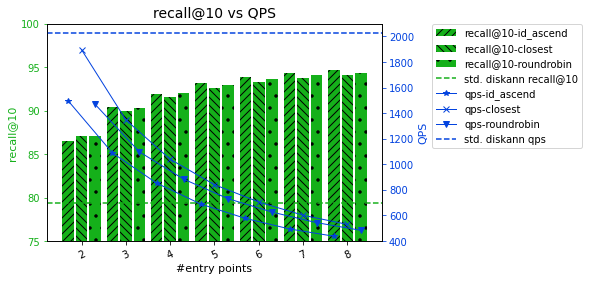

In [141]:
fig, ax = plt.subplots()
# fig = plt.figure(1)
# ax = fig.add_subplot(1,2,1)
# legend_ax = fig.add_subplot(1,2,2)

# 柱形的宽度
width = 1.3
interval = width+width/6

# 柱形的间隔
x1_list = []
x2_list = []
x3_list = []
for i in range(0, len(id_ascend)*5,5):
    x1_list.append(i)
    x2_list.append(i + interval)
    x3_list.append(i + 2*interval)

# 绘制柱形图1
recall1 = ax.bar(x1_list, id_ascend['recall@10'],
                 width=width,label='recall@10-id_ascend',
                 color = sns.xkcd_rgb["green"],hatch='///',
                 tick_label = id_ascend['entry points'],
                 align='center')

recall2 = ax.bar(x2_list, closest_rep['recall@10'],
                 width=width,label='recall@10-closest',
                 color = sns.xkcd_rgb["green"],hatch='\\\\\\', 
                 tick_label = closest_rep['entry points'],align='center')

recall3 = ax.bar(x3_list, roundrobin['recall@10'],
                 width=width,label='recall@10-roundrobin',
                 color = sns.xkcd_rgb["green"],hatch='.',
                 tick_label = roundrobin['entry points'],align='center')

ax.set_ylim(75,100)
ax.set_xticks(x2_list)
ax.set_xticklabels(id_ascend['entry points'])
ax.set_xlabel('#entry points',fontsize=11)
ax.set_ylabel('recall@10',fontsize=11)

# 绘制柱形图2---双Y轴
ax1 = ax.twinx()
qps1 = ax1.plot(x1_list, id_ascend['qps'], color=sns.xkcd_rgb["blue"], marker='*', linestyle='-', linewidth=1, markersize=6)
qps2 = ax1.plot(x2_list, closest_rep['qps'], color=sns.xkcd_rgb["blue"], marker='x', linestyle='-', linewidth=1, markersize=6)
qps3 = ax1.plot(x3_list, roundrobin['qps'], color=sns.xkcd_rgb["blue"], marker='v', linestyle='-', linewidth=1, markersize=6)
ax1.set_ylim(400,2100)
ax1.set_ylabel("QPS",fontsize=11)

# 坐标轴标签设置
ax.set_title('recall@10 vs QPS',fontsize = 14)

# x轴标签旋转
ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)

# 双Y轴标签颜色设置
ax.yaxis.label.set_color(recall1[0].get_facecolor())
ax1.yaxis.label.set_color(qps1[0].get_color())

# # 双Y轴刻度颜色设置
ax.tick_params(axis = 'y', colors = recall1[0].get_facecolor())
ax1.tick_params(axis = 'y', colors = qps1[0].get_color())

# # 网格设置
# plt.grid('off')

# baseline
ax.axhline(y=79.4, c=recall1[0].get_facecolor(), linestyle='--', label="std. diskann recall@10")
ax1.axhline(y=2029.05, c=qps1[0].get_color(), linestyle='--', label="std. diskann qps")


# 图例设置
plt.legend(
    loc=2, bbox_to_anchor=(1.15,1.0), borderaxespad=0.,
    handles = [
        recall1, 
        recall2,
        recall3,
        Line2D([0], [0], color=recall1[0].get_facecolor(),linestyle='--', label='std. diskann recall@10'),
        Line2D([0], [0], color=qps1[0].get_color(),marker=qps1[0].get_marker(), lw=qps1[0].get_linewidth(), label='qps-id_ascend'),
        Line2D([0], [0], color=qps2[0].get_color(),marker=qps2[0].get_marker(), lw=qps2[0].get_linewidth(), label='qps-closest'),
        Line2D([0], [0], color=qps3[0].get_color(),marker=qps3[0].get_marker(), lw=qps3[0].get_linewidth(), label='qps-roundrobin'),
        Line2D([0], [0], color=qps3[0].get_color(),linestyle='--', label='std. diskann qps')
    ])

# set legend loc
# ax.legend(loc=2, bbox_to_anchor=(1.05,1.0), borderaxespad=0.)
plt.show()

In [88]:
# initialize data
id_ascend=pd.DataFrame(
    [
        [2, 1497.37, 86.53], 
        [3, 1089.28, 90.37],
        [4, 852.51, 91.95], 
        [5, 688.36, 93.17], 
        [6, 577.07, 93.88], 
        [7, 494.24, 94.33], 
        [8, 437.53, 94.63], 
    ], 
    columns=['entry points', 'qps','recall@10'])#.set_index('entry points')


closest_rep=pd.DataFrame(
    [
        [2, 1896.22, 87.05], 
        [3, 1347.79, 89.99],
        [4, 1039.49, 91.59], 
        [5, 840.76, 92.59], 
        [6, 705.03, 93.25], 
        [7, 601.65, 93.74], 
        [8, 529.94, 94.07], 
    ], 
    columns=['entry points', 'qps','recall@10'])#.set_index('entry points')

roundrobin=pd.DataFrame(
    [
        [2,1470.12, 87.04], 
        [3, 1098.24,90.33],
        [4, 883.99,91.99], 
        [5, 731.79, 92.94], 
        [6, 625.97,93.60], 
        [7, 543.89,94.04], 
        [8, 483.65, 94.36], 
    ], 
    columns=['entry points', 'qps','recall@10'])#.set_index('entry points')

In [ ]:
# ax2 = ax.twinx()
# ax2.plot(df[['sales_gr','net_pft_gr']].values, linestyle='-', marker='o', linewidth=2.0)

# # 柱形的宽度
# width = 0.4

# # 柱形的间隔
# x1_list = []
# x2_list = []
# for i in range(len(id_ascend)):
#     x1_list.append(i)
#     x2_list.append(i + width)

# # 绘制柱形图1
# b1 = ax1.bar(x1_list, id_ascend['recall@10'],width=width,label='缺失项目数',color = sns.xkcd_rgb["pale red"],tick_label = df_nan['entry point'])

# # 绘制柱形图2---双Y轴
# ax2 = ax1.twinx()
# b2 = ax2.plot(x2_list, df['项目数'],width=width,label='总项目数',color = sns.xkcd_rgb["denim blue"])

# # 坐标轴标签设置
# ax1.set_title('资助金额字段缺失分析-学科',fontsize = 14)
# ax1.set_xlabel('学科',fontsize=12)
# ax1.set_ylabel('缺失项目数',fontsize=12)
# ax2.set_ylabel('总项目数',fontsize=12)

# # x轴标签旋转
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 25)

# # 双Y轴标签颜色设置
# ax1.yaxis.label.set_color(b1[0].get_facecolor())
# ax2.yaxis.label.set_color(b2[0].get_facecolor())

# # 双Y轴刻度颜色设置
# ax1.tick_params(axis = 'y', colors = b1[0].get_facecolor())
# ax2.tick_params(axis = 'y', colors = b2[0].get_facecolor())

# # 图例设置
# plt.legend(handles = [b1,b2])

# # 网格设置
# plt.grid('off')

# plt.show()